## M. Wright Pymaceuticals Assignment 

* In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how the mice did on each of the four treatments <b>(Capomulin, Infubinol, Ketapril, and Placebo)</b> compare.

#To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

#As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.


# Observations 
* When comparing Capomulin, Infubinol, Katapril and a Placebo drug, Capomulin had the most notable positive effect on the tumor over the course of the 45 day trial suggesting it is the better drug treatment option. 
* The Capomulin drug reducing the tumor volume by 19%. 
* The mice on capomulin drug had the slowest metastatic spread of the tumor while the Placebo and Ketapril had the fastest. 
* The rate of survival of the mice was better for the mice on Capomulin showing that the mice had a better chance of surviving while on Capomulin for their treatment option when compared to Infubinol or Ketapril. 
* This study would support that when comparing these four drug options for treatment, the drug Comulin has the best trial results as a treatment option over Infubinol or Ketrapril or Nothing (placebo).  

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (There are two datasets)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_df, clinical_df , on='Mouse ID', how = "left")
mouse = combined_data_df["Mouse ID"].unique()
drugs = combined_data_df["Drug"].unique()
time = combined_data_df["Timepoint"].unique()

mouse_count = combined_data_df["Mouse ID"].nunique()
drugs_count = combined_data_df["Drug"].value_counts()
timepoint = combined_data_df["Timepoint"].unique()

# Display the data table for preview

combined_data_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [2]:
combined_data_df.tail()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#group by Drug and Timepoint Columns
#Groupby two columns and return the mean of the remaining column.
#Find the Mean of Tumor Volume Data Column from the grouped data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html
mean_tumor_vol = combined_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'].reset_index()
#mean_vol_data = group_drug_time.mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol) 
# Preview DataFrame
mean_tumor_vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#Grouped 
se_tumor_vol = combined_data_df.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"].reset_index() 
#.sem to find the standard error 
#std_error = grouped_drug_time
#Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(se_tumor_vol)#.reset_index() had to comment this out because of the errors
# Preview DataFrame
tumor_vol_sem_df.head()


 

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#Source:https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
#reset index and use the .pivot to 
#.pivot can transpose values , changing axis based on columns and it can handle dataframe 
#transpose can only handle series vs. groupby 
mean_tumor_vol = mean_tumor_vol#.reset_index()
#mean_tumor_vol
mean_tumor_vol_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
 
mean_tumor_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:

#tumor_vol_sem_df = tumor_vol_sem_df#.reset_index()
tumor_vol_sem_df_pivot = tumor_vol_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_vol_sem_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


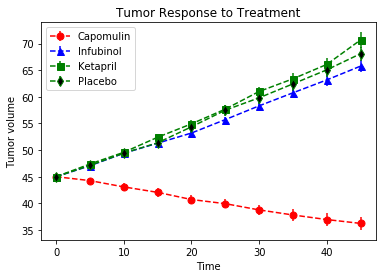

In [49]:
# Generate the Plot (with Error Bars)
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
#how to make the shapes of the markers: https://matplotlib.org/3.1.1/api/markers_api.html

plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot['Capomulin'], yerr=tumor_vol_sem_df_pivot['Capomulin'], marker='o', mfc='red', color='r', ls='dashed',  ms=7, mew=1, label='Capomulin')
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot['Infubinol'], yerr=tumor_vol_sem_df_pivot['Infubinol'], marker='^', mfc='blue', color='b', ls='dashed', ms=7, mew=1, label='Infubinol')
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot['Ketapril'], yerr=tumor_vol_sem_df_pivot['Ketapril'], marker='s', mfc='green', color='g', ls='dashed', ms=7, mew=1, label='Ketapril')
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot['Placebo'], yerr=tumor_vol_sem_df_pivot['Placebo'], marker='d', mfc='black', color='g', ls='dashed', ms=7, mew=1, label='Placebo')

plt.legend(loc='upper left')
# Add title and axis names
plt.title('Tumor Response to Treatment')
plt.xlabel('Time')
plt.ylabel('Tumor volume')
# Save the Figure
fig.savefig("tumor_response.png")



## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metastatic_response = combined_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'].reset_index()
 
# Convert to DataFrame
mean_metastatic_response_df = pd.DataFrame(mean_metastatic_response) 
# Preview DataFrame
mean_metastatic_response_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [9]:
# Store the Standard Error of the Mean Met. Site Data Grouped by Drug and Timepoint
#Grouped 
se_metastatic_response = combined_data_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'].reset_index() 
#.sem to find the standard error 
#std_error = grouped_drug_time
#Convert to DataFrame
metastatic_response_sem_df = pd.DataFrame(se_metastatic_response) 
metastatic_response_sem_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [10]:
# Minor Data Munging to Re-Format the Data Frames
#Source:https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
#reset index and use the .pivot to 
#.pivot can transpose values , changing axis based on columns and it can handle dataframe 
#transpose can only handle series vs. groupby 
mean_metastatic_response = mean_metastatic_response
#mean_metastatic_response
mean_metastatic_response_pivot = mean_metastatic_response.pivot(index="Timepoint", columns="Drug")['Metastatic Sites']

# Preview that Reformatting worked
 
mean_metastatic_response_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
#reformat SEM dataframe of the metastatic response (spread)
#metastatic_response_sem_df = metastatic_response_sem_df#.reset_index()
metastatic_response_sem_df_pivot = metastatic_response_sem_df.pivot(index="Timepoint", columns="Drug")['Metastatic Sites']
# Preview that Reformatting worked
metastatic_response_sem_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


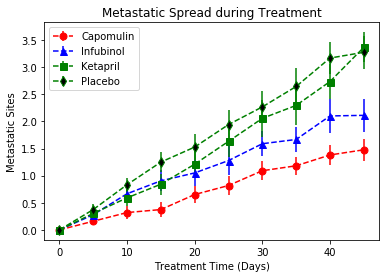

In [48]:
# Generate the Plot (with Error Bars)
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
#how to make the shapes of the markers: https://matplotlib.org/3.1.1/api/markers_api.html

plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_df_pivot['Capomulin'], marker='o', mfc='red', color='r', ls='dashed',  ms=7, mew=1, label='Capomulin')
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_df_pivot['Infubinol'], marker='^', mfc='blue', color='b', ls='dashed', ms=7, mew=1, label='Infubinol')
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_df_pivot['Ketapril'], marker='s', mfc='green', color='g', ls='dashed', ms=7, mew=1, label='Ketapril')
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_df_pivot['Placebo'], marker='d', mfc='black', color='g', ls='dashed', ms=7, mew=1, label='Placebo')

plt.legend(loc='upper left')
# Add title and axis names
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Treatment Time (Days)')
plt.ylabel('Metastatic Sites')
# Save the Figure
fig.savefig("metastatic_spread.png")



## Survival Rates

In [13]:
# Save the Mouse Data 
#group the mice data by drug and Timepoint 
#count the number of mice left 
# Convert to DataFrame of the mouse ID count in the combined dataframe 
mouse_data = combined_data_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Preview Data
mouse_data
 

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
                        ..
Zoniferol  25           16
           30           15
           35           14
           40           14
           45           14
Name: Mouse ID, Length: 100, dtype: int64

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint  

# Convert to DataFrame
mouse_data_df = pd.DataFrame(mouse_data)
#rename Mouse ID to "Mouse Count"
mouse_data_df = mouse_data_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mouse_data_df 

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [34]:
# Minor Data Munging to Re-Format the Data Frames
#Source:https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
#reset index and use the .pivot to transpose values , changing axis based on columns and it can handle dataframe 

mouse_data_df_pivot = mouse_data_df.pivot_table(index="Timepoint", columns="Drug", values='Mouse Count')

# Preview that Reformatting worked
mouse_data_df_pivot 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


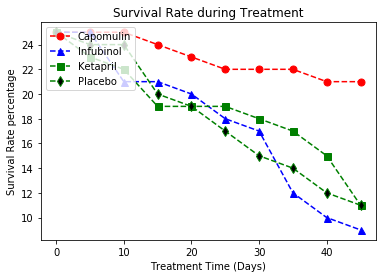

In [47]:
# Generate the Plot (to show the survival rate during the treatment)

plt.errorbar(mouse_data_df_pivot.index, mouse_data_df_pivot['Capomulin'], marker='o', mfc='red', color='r', ls='dashed',  ms=7, mew=1, label='Capomulin')
plt.errorbar(mouse_data_df_pivot.index, mouse_data_df_pivot['Infubinol'], marker='^', mfc='blue', color='b', ls='dashed', ms=7, mew=1, label='Infubinol')
plt.errorbar(mouse_data_df_pivot.index, mouse_data_df_pivot['Ketapril'], marker='s', mfc='green', color='g', ls='dashed', ms=7, mew=1, label='Ketapril')
plt.errorbar(mouse_data_df_pivot.index, mouse_data_df_pivot['Placebo'], marker='d', mfc='black', color='g', ls='dashed', ms=7, mew=1, label='Placebo')

plt.legend(loc='upper left')
# Add title and axis names
plt.title('Survival Rate during Treatment')
plt.xlabel('Treatment Time (Days)')
plt.ylabel('Survival Rate percentage')

# Save the Figure
fig.savefig("survival_rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
tumor_change = ((mean_tumor_vol_pivot.iloc[-1]-mean_tumor_vol_pivot.iloc[0])/mean_tumor_vol_pivot.iloc[0])*100
# Display the data to confirm
tumor_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

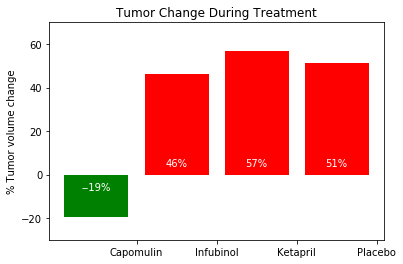

In [46]:
# Store all Relevant Percent Changes into a Tuple
tuple_percent_changes = (tumor_change['Capomulin'],
                        tumor_change['Infubinol'],
                        tumor_change['Ketapril'],
                        tumor_change['Placebo'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(tuple_percent_changes))
width = .8
passing = ax.bar(ind[0], tuple_percent_changes[0], width, color='g')
failing = ax.bar(ind[1:], tuple_percent_changes[1:], width, color='r')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor volume change')
ax.set_title('Tumor Change During Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin','Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])

# Use functions to label the percentages of changes
def autolabelfail(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2.,3,
               '%d%%' % int(height),
               ha='center', va='bottom', color='white')

def autolabelpass(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., -8, 
               '-%d%%' % int(height),
               ha='center', va='bottom', color='white')
# Call functions to implement the function calls
autolabelpass(passing)
autolabelfail(failing)

# Save the Figure
fig.savefig("summary.png")

# Show the Figure
fig.show()